In [2]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

def run_cpp_matrix_generator(L, P, Inh, matrix_type):
    compile_command = "g++ -O3 Matrix_conect.cpp Matrices_generador.cpp -o matrix_generator"
    subprocess.run(compile_command, shell=True, check=True)
    # Ejecuta el ejecutable de C++
    result = subprocess.run(['./matrix_generator', str(L), str(P), str(Inh), matrix_type],
                            stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    if result.returncode != 0:
        print("Error:", result.stderr)
        return None
    
    # Procesa la salida del programa C++
    matrix_str = result.stdout.strip().split('\n')
    matrix = [list(map(int, row.split())) for row in matrix_str]
    
    return np.array(matrix)

def save_matrix_to_file(matrix, filename):
    np.savetxt(filename, matrix, fmt='%d')

# 'L': 21, 'P': 0.14901729867537541, 'Inh': 0.6575696242043221
L = 4  # Tamaño de la matriz
P = 0.14901729867537541 # Probabilidad
Inh = 0.6575696242043221  # Umbral de inhibición

# Generar y guardar las matrices
matrix_types = ['regular', 'small_word_uni', 'small_word_Bi', 'random_bi', 'random_uni']

for m_type in matrix_types:
    matrix = run_cpp_matrix_generator(L, P, Inh, m_type)
    if matrix is not None:
        filename = f'Matrices/{m_type}_matrix.txt'
        save_matrix_to_file(matrix, filename)
        print(f'Matriz {m_type} guardada en {filename}')


Matriz regular guardada en Matrices/regular_matrix.txt
Matriz small_word_uni guardada en Matrices/small_word_uni_matrix.txt
Matriz small_word_Bi guardada en Matrices/small_word_Bi_matrix.txt
Matriz random_bi guardada en Matrices/random_bi_matrix.txt
Matriz random_uni guardada en Matrices/random_uni_matrix.txt


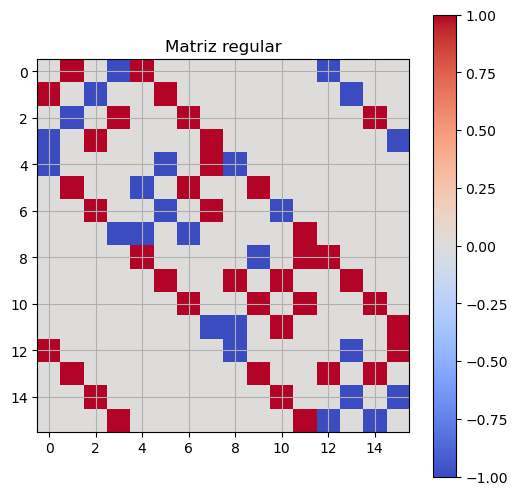

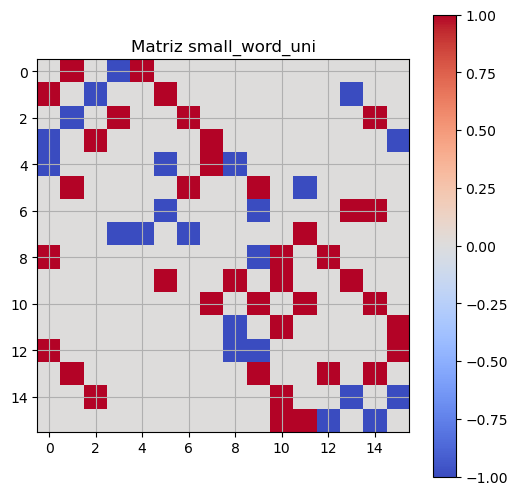

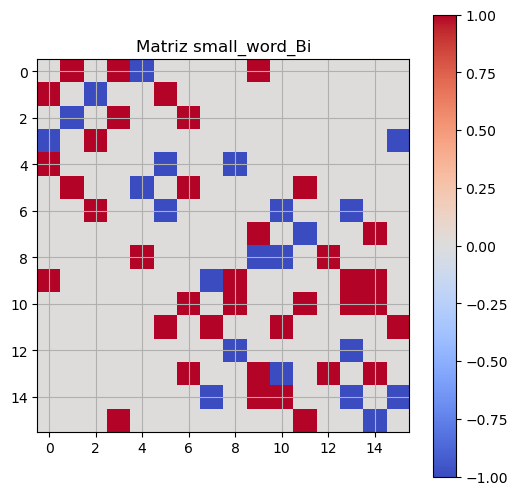

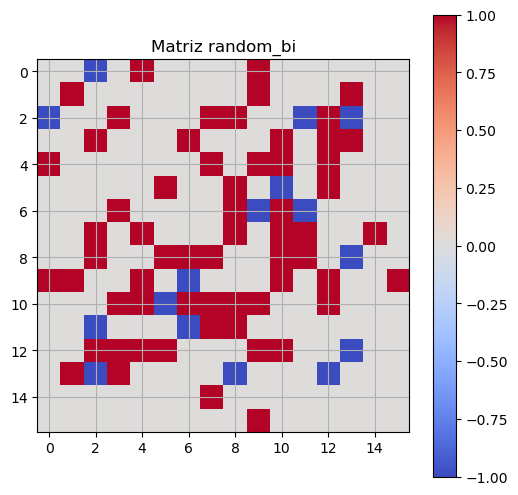

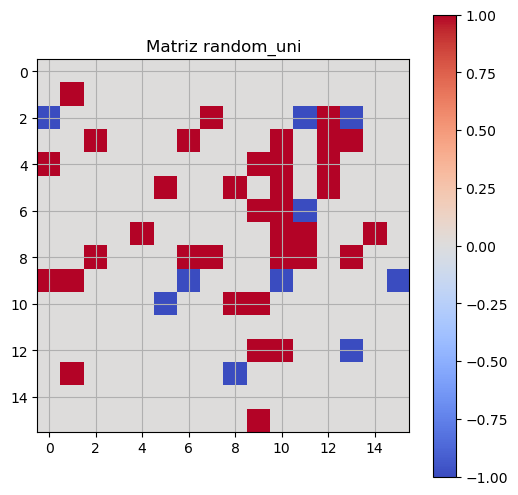

In [3]:

def plot_matrix(matrix, title):
    plt.figure(figsize=(6,6))
    plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Imprimir y graficar las matrices
for m_type in matrix_types:
    filename = f'Matrices/{m_type}_matrix.txt'
    matrix = np.loadtxt(filename, dtype=int)
    plot_matrix(matrix, f'Matriz {m_type}')

